## Praktikum 2

### Langkah 1: Mengimpor Library

In [1]:
# mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Langkah 2: Mengimpor Dataset

In [2]:
# mengimpor dataset
dataset = pd.read_csv('data/Posisi_gaji.csv')
# mengambil kolom kedua (indeks 1) sebagai fitur (variabel independen) x
X = dataset.iloc[:, 1:2].values
# mengambil kolom ketiga (indeks 2) sebagai target (variabel dependen) y
y = dataset.iloc[:, 2].values

### Langkah 3: Feature Scaling

In [4]:
# mengimpor library
from sklearn.preprocessing import StandardScaler

# membuat objek StandardScaler untuk fitur (X) dan target (y)
sc_X = StandardScaler()
sc_y = StandardScaler()

# melakukan penskalaan pada fitur (X) dan target (y)
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))


### Langkah 4: Fitting SVR ke Dataset

In [7]:
# mengimport library
from sklearn.svm import SVR

# membuat objek SVR dengan kernel radial (RBF)
regressor = SVR(kernel='rbf')

# melatih model SVR pada data yang telah di-scaling (X dan y)
regressor.fit(X, y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Langkah 5: Visualisasi Hasil SVR

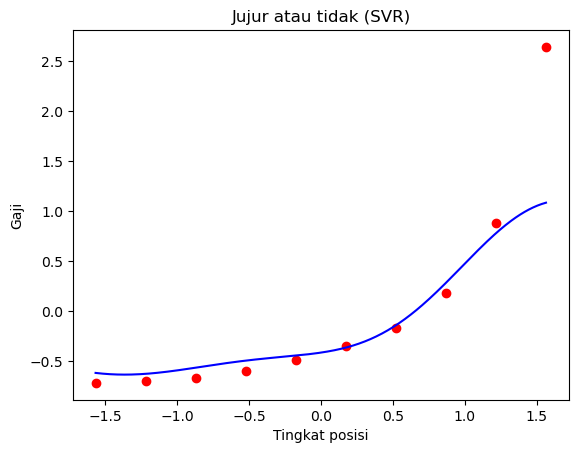

In [8]:
# visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

### Langkah 6: Prediksi Hasil

In [9]:
# prediksi hasil
# buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

### Langkah 7: Menampilkan Hasil

In [10]:
# menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [0.01150915]


### Langkah 8: Validasi Hasil

### Langkah 9: Evaluasi Model SVR

In [11]:
# evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y 
y_pred = regressor.predict(X)

# menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# menghitung RMSE
rmse = np.sqrt(mse)

# menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22322362280774546
MSE: 0.24861632111450263
RMSE: 0.49861440123055273
R-squared: 0.7513836788854974
